In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Experiments with different arrival times

In [46]:
filename = 'arrival_time_results.csv'
df = pd.read_csv(filename)
df.head()

,compute_type,num_workers,batch_size,experiment_type,arrival_rate,num_requests,total_time,successful_requests,average_time_per_request,throughput,average_latency,min_latency,max_latency,latency_90,latency_95,latency_99,model_id,avg_queue_time,avg_execution_time
0,process,2,1,poisson,0.70,40,28.225318,40,0.705633,1.417167,0.724069,0.667091,0.790671,0.771225,0.787662,0.790671,stabilityai/sd-turbo,0.056010,0.668059
1,process,1,2,poisson,0.70,40,28.379424,40,0.709486,1.409472,1.157519,0.802607,1.524153,1.509847,1.512683,1.524153,stabilityai/sd-turbo,0.360386,0.797133
2,mps,2,1,poisson,0.70,40,28.162579,40,0.704064,1.420324,0.723288,0.668063,0.789701,0.769639,0.779024,0.789701,stabilityai/sd-turbo,0.055193,0.668096
3,process,2,1,poisson,0.62,40,25.252436,40,0.631311,1.584006,1.076774,0.677252,1.673445,1.418127,1.615241,1.673445,stabilityai/sd-turbo,0.244125,0.832649
4,process,1,2,poisson,0.62,40,25.245631,40,0.631141,1.584433,1.116904,0.804075,1.432293,1.428955,1.430166,1.432293,stabilityai/sd-turbo,0.319893,0.797011


In [5]:
df["eff_batch_size"] = df["batch_size"] * df["num_workers"]
df['config'] = df.apply(lambda row: f"{row['compute_type']}-{row['num_workers']}workers", axis=1)


In [8]:

def visualize(model_id):
    arrival_rates = df['arrival_rate'].unique()
    
    # Plot for Throughput
    fig, axes = plt.subplots(1, len(arrival_rates), figsize=(5 * len(arrival_rates), 5))
    for i, arrival_rate in enumerate(arrival_rates):
        sns.barplot(x='eff_batch_size', y='throughput', hue='config', data=df[
            (df['experiment_type'] == 'poisson') &
            (df['model_id'] == model_id) &
            (df['arrival_rate'] == arrival_rate)], ax=axes[i])
        axes[i].set_title(f'Throughput at {arrival_rate} arrival time (sec/requst)')
        axes[i].set_xlabel('Effective Batch Size')
        axes[i].set_ylabel('Throughput (requests/s)')
        axes[i].legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    fig.suptitle(f'Throughput vs. Batch Size')
    plt.show()

    # Plot for Average Latency
    fig, axes = plt.subplots(1, len(arrival_rates), figsize=(5 * len(arrival_rates), 5))
    for i, arrival_rate in enumerate(arrival_rates):
        sns.barplot(x='eff_batch_size', y='average_latency', hue='config', data=df[
            (df['experiment_type'] == 'poisson') &
            (df['model_id'] == model_id) &
            (df['arrival_rate'] == arrival_rate)], ax=axes[i])
        axes[i].set_title(f'Latency Avg at {arrival_rate} arrival time (sec/requst)')
        axes[i].set_xlabel('Effective Batch Size')
        axes[i].set_ylabel('Latency Avg (s)')
        axes[i].legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    fig.suptitle(f'Latency Avg vs. Batch Size')
    plt.show()

    # Plot for 95th Percentile Latency
    fig, axes = plt.subplots(1, len(arrival_rates), figsize=(5 * len(arrival_rates), 5))
    for i, arrival_rate in enumerate(arrival_rates):
        sns.barplot(x='eff_batch_size', y='latency_95', hue='config', data=df[
            (df['experiment_type'] == 'poisson') &
            (df['model_id'] == model_id) &
            (df['arrival_rate'] == arrival_rate)], ax=axes[i])
        axes[i].set_title(f'Latency 95% at {arrival_rate} arrival time (sec/requst)')
        axes[i].set_xlabel('Effective Batch Size')
        axes[i].set_ylabel('Latency 95% (s)')
        axes[i].legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    fig.suptitle(f'Latency 95% vs. Batch Size')
    plt.show()
def visualize_latency_vs_throughput(model_id):
    fig, ax = plt.subplots(figsize=(10, 6))
    subset = df[(df['model_id'] == model_id) & (df['experiment_type'] == 'poisson')]
    
    # Create a line plot with markers
    sns.lineplot(x='throughput', y='average_latency', hue='config', data=subset, marker='o', ax=ax)
    
    plt.title(f'Latency vs. Throughput for Poisson Load, {model_id}')
    plt.xlabel('Throughput (requests/s)')
    plt.ylabel('Average Latency (ms)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


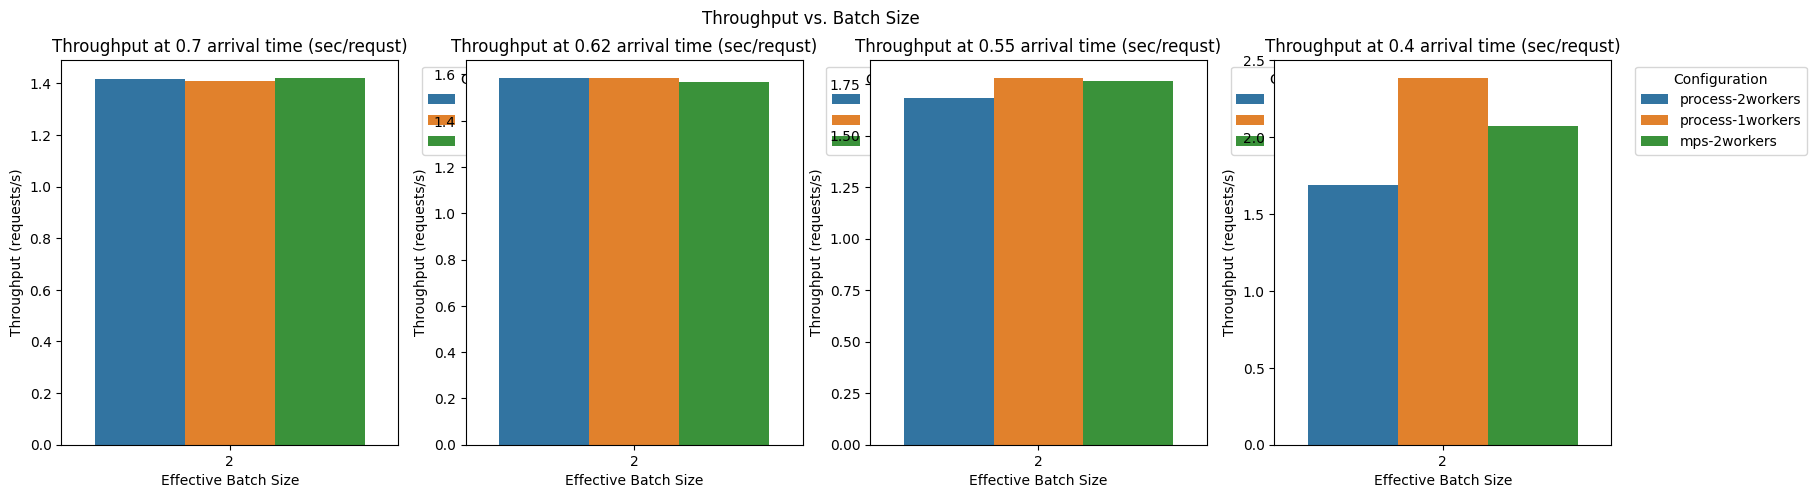

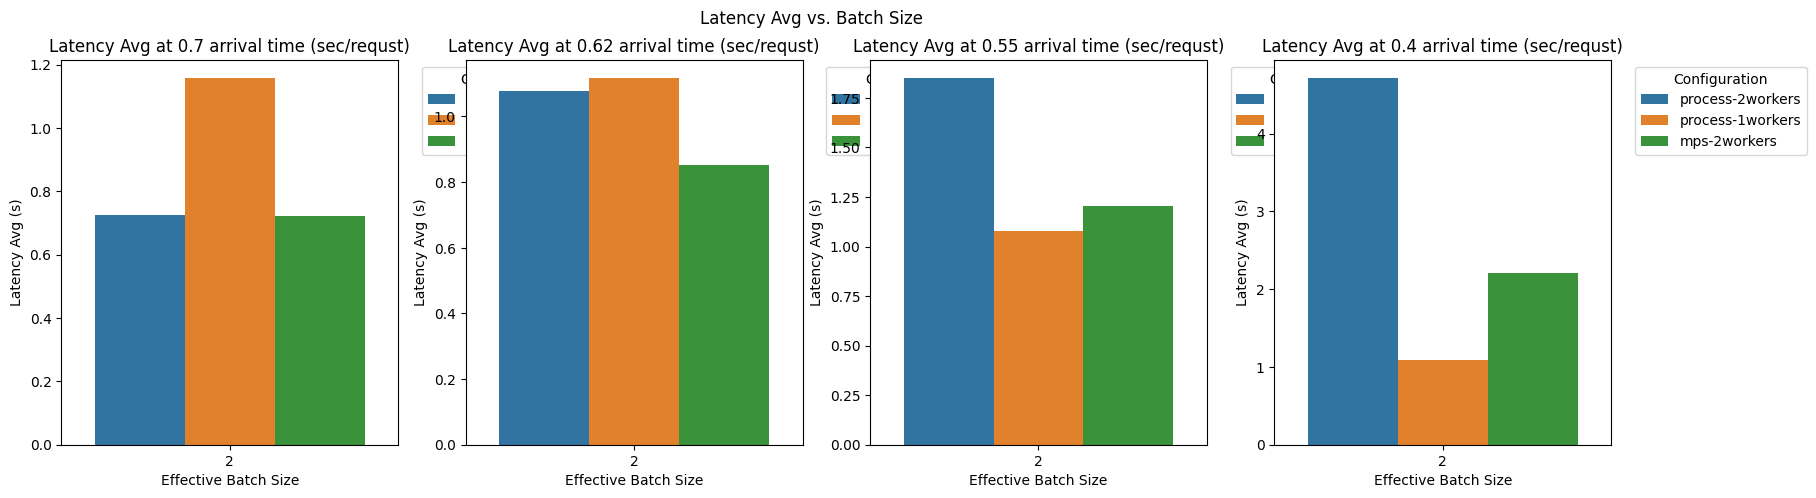

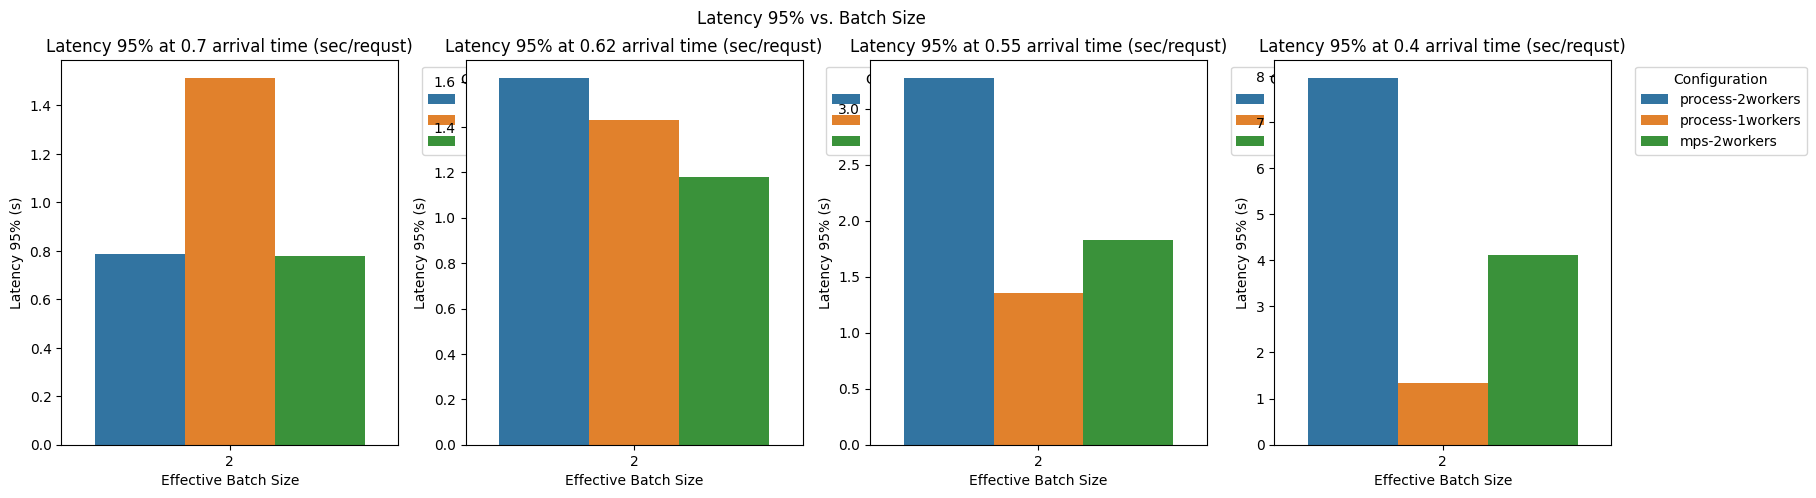

In [9]:
visualize("stabilityai/sd-turbo")

# Unsaturated Arrival Times

In [63]:
filename = 'arrival_times_unsaturated.csv'
df = pd.read_csv(filename)
df.head()

,compute_type,num_workers,batch_size,experiment_type,arrival_rate,num_requests,total_time,successful_requests,average_time_per_request,throughput,average_latency,min_latency,max_latency,latency_90,latency_95,latency_99,model_id,avg_queue_time,avg_execution_time
0,process,1,1,poisson,0.64,64,42.219875,64,0.659686,1.515874,1.213954,0.679987,1.728433,1.627529,1.679242,1.728433,stabilityai/sd-turbo,0.556322,0.657633
1,process,1,2,poisson,0.64,64,41.406108,64,0.646970,1.545666,1.124587,0.801241,1.449657,1.446019,1.446847,1.449657,stabilityai/sd-turbo,0.329866,0.794721
2,process,1,4,poisson,0.39,64,26.461061,64,0.413454,2.418648,2.046835,1.353152,2.793357,2.652606,2.698489,2.793357,stabilityai/sd-turbo,0.700002,1.346833
3,process,1,8,poisson,0.34,64,26.980692,64,0.421573,2.372067,3.838843,2.305616,5.628236,4.991340,5.104936,5.628236,stabilityai/sd-turbo,1.463240,2.375603
4,process,1,1,poisson,1.40,64,97.676882,64,1.526201,0.655222,5.430922,1.518441,9.339140,8.596557,8.967664,9.339140,stabilityai/stable-diffusion-xl-base-1.0,3.905754,1.525168


In [64]:
df["eff_batch_size"] = df["batch_size"] * df["num_workers"]
df['config'] = df.apply(lambda row: f"{row['compute_type']}-{row['num_workers']}workers", axis=1)


In [65]:
def visualize(model_id):
    fig, ax = plt.subplots()
    sns.barplot(x='eff_batch_size', y='throughput', hue='config', data=df[
        (df['experiment_type'] == 'poisson') &
        (df['model_id'] == model_id)], ax=ax)
    plt.title(f'Throughput vs. Batch Size for Poisson Load, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Throughput (requests/s)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    fig, ax = plt.subplots()
    sns.barplot(x='eff_batch_size', y='average_latency', hue='config', data=df[
        (df['experiment_type'] == 'poisson') &
        (df['model_id'] == model_id)], ax=ax)
    plt.title(f'Latency Avg vs. Batch Size for Poisson Load, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Latency Avg (requests/s)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    fig, ax = plt.subplots()
    sns.barplot(x='eff_batch_size', y='latency_95', hue='config', data=df[
        (df['experiment_type'] == 'poisson') &
        (df['model_id'] == model_id)], ax=ax)
    plt.title(f'Latency 95% vs. Batch Size for Poisson Load, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Latency 95% (requests/s)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def visualize_latency_vs_throughput(model_id):
    fig, ax = plt.subplots(figsize=(10, 6))
    subset = df[(df['model_id'] == model_id) & (df['experiment_type'] == 'poisson')]
    
    # Create a line plot with markers
    sns.lineplot(x='throughput', y='average_latency', hue='config', data=subset, marker='o', ax=ax)
    
    plt.title(f'Latency vs. Throughput for Poisson Load, {model_id}')
    plt.xlabel('Throughput (requests/s)')
    plt.ylabel('Average Latency (ms)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


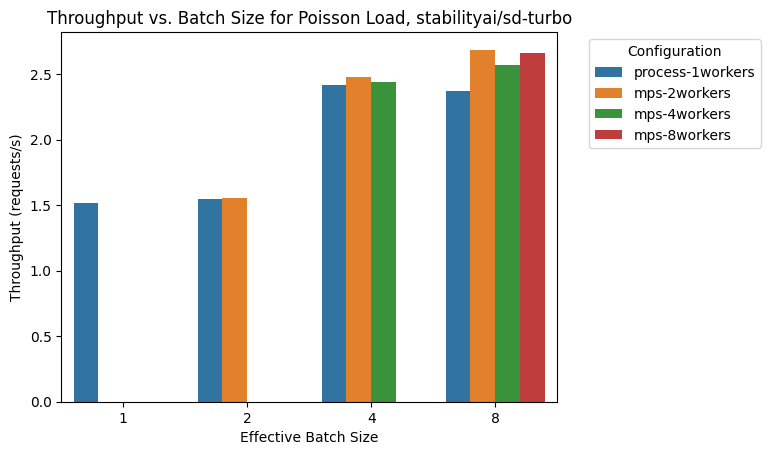

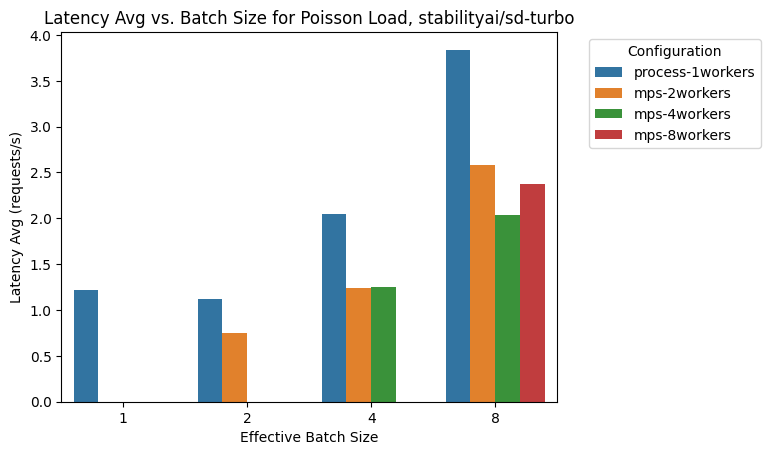

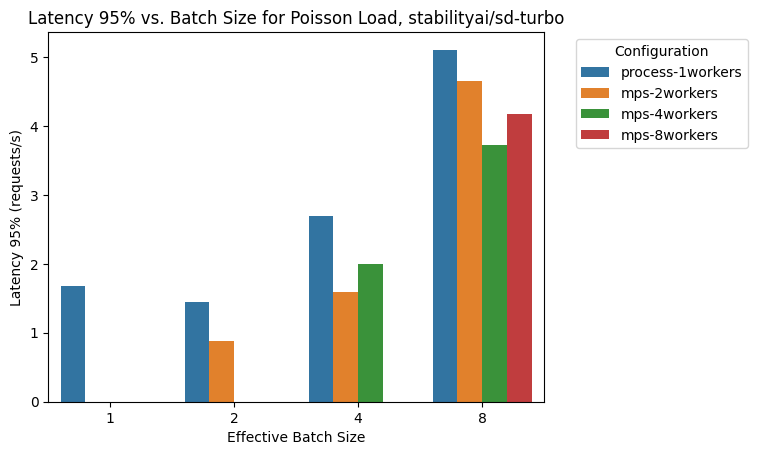

In [66]:
visualize("stabilityai/sd-turbo")

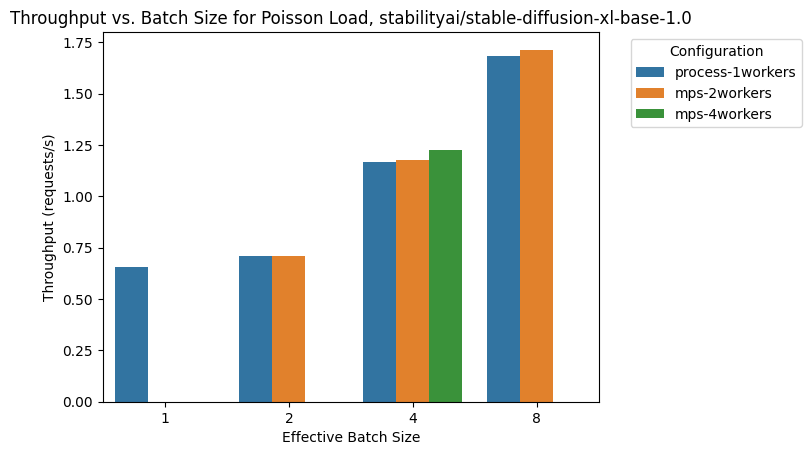

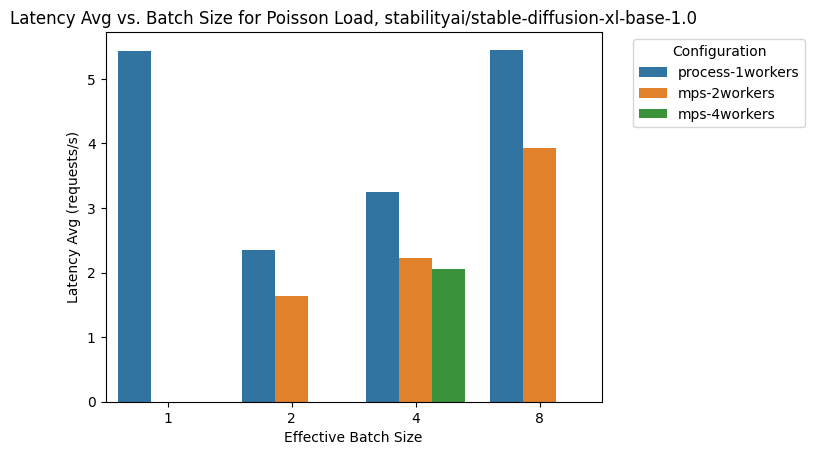

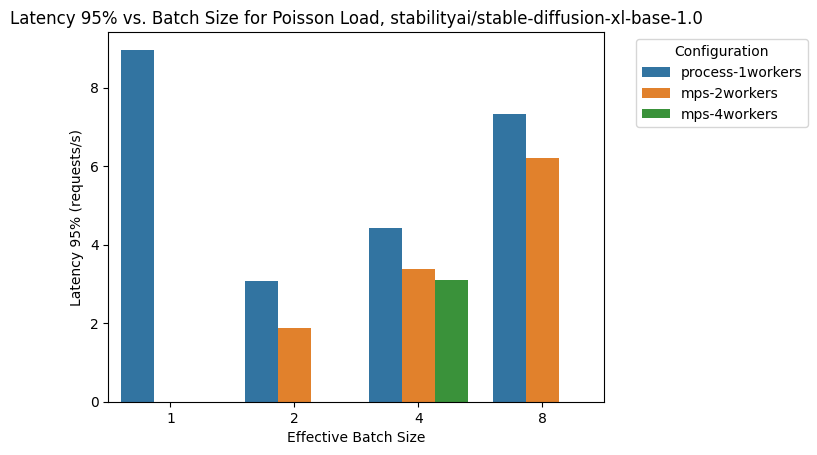

In [60]:
visualize("stabilityai/stable-diffusion-xl-base-1.0")

# Saturated Arrival Times

In [67]:
filename = 'arrival_times_saturated.csv'
df = pd.read_csv(filename)
df["eff_batch_size"] = df["batch_size"] * df["num_workers"]
df['config'] = df.apply(lambda row: f"{row['compute_type']}-{row['num_workers']}workers", axis=1)

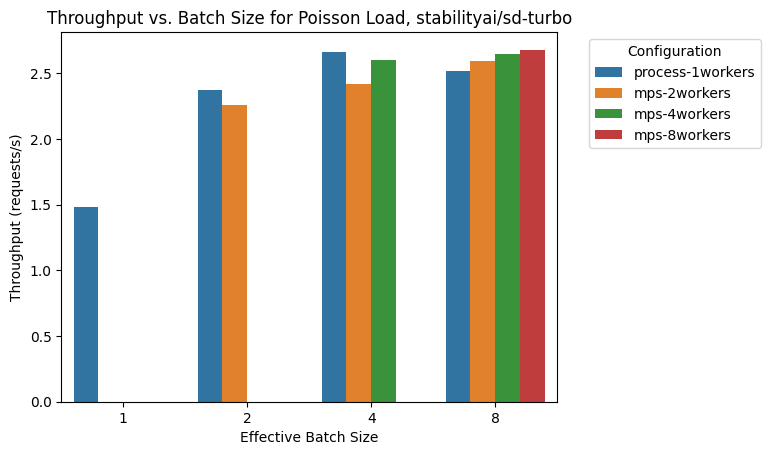

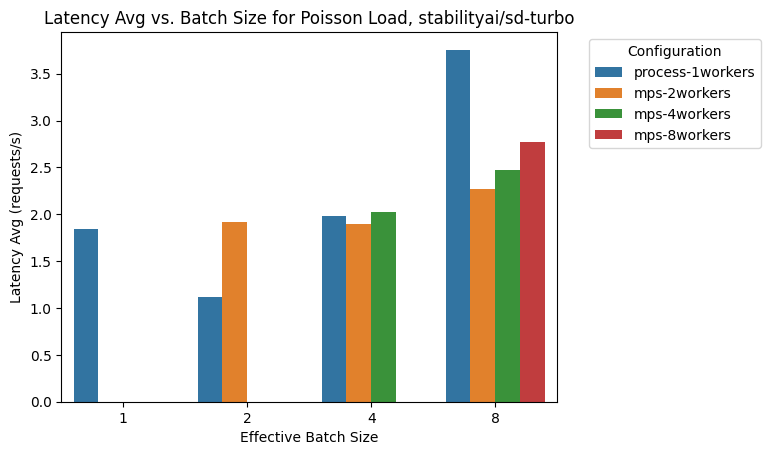

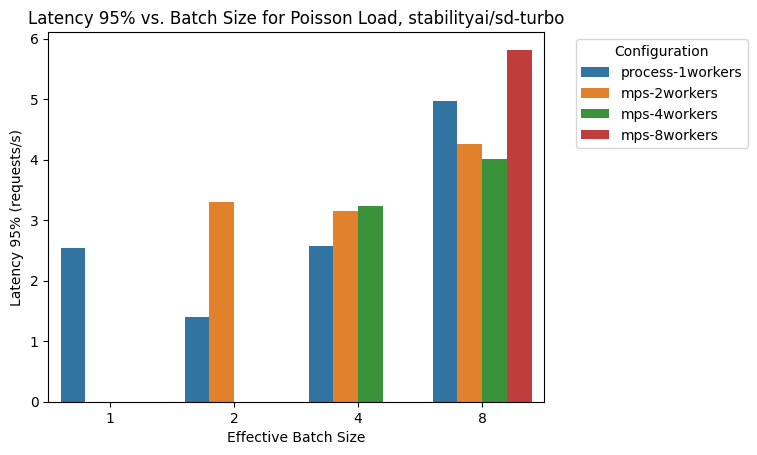

In [68]:
visualize("stabilityai/sd-turbo")

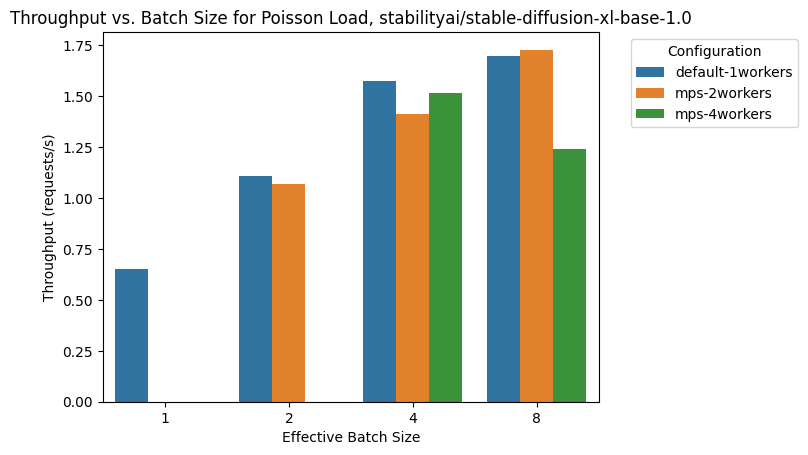

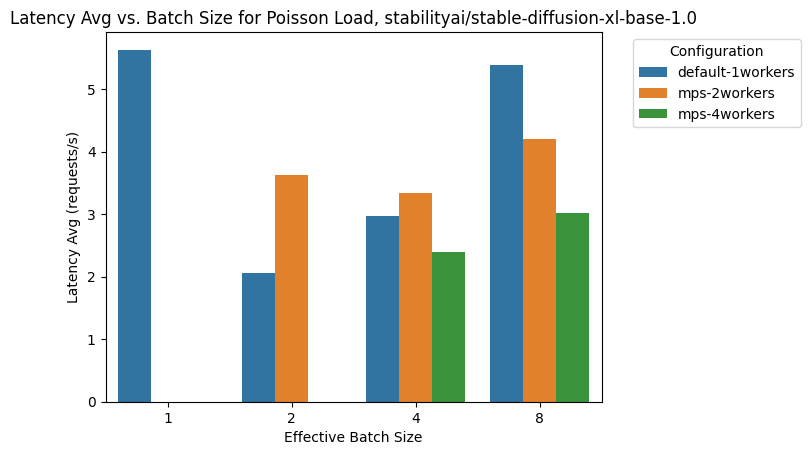

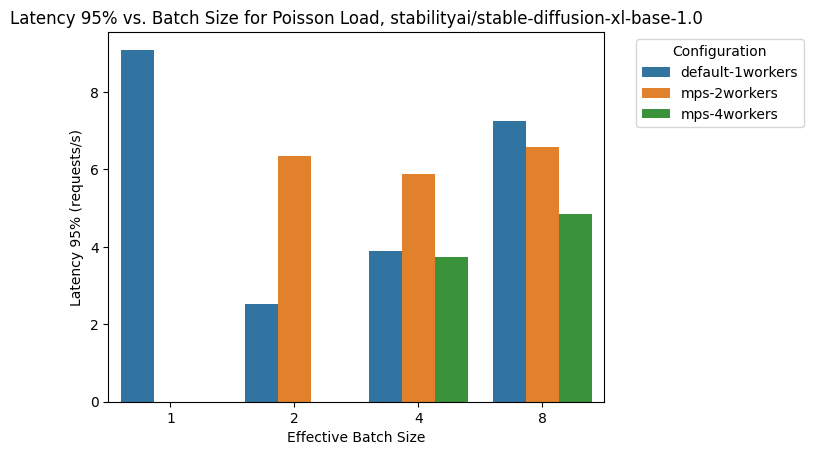

In [69]:
visualize("stabilityai/stable-diffusion-xl-base-1.0")